In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk

In [2]:
df = pd.read_csv(r'Reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df['%helpfulness'] = np.where(df['HelpfulnessDenominator']!=0, df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'], -1)

In [5]:
list(df['HelpfulnessDenominator'])

[1,
 0,
 1,
 3,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 4,
 1,
 2,
 5,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 19,
 13,
 9,
 3,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 1,
 7,
 4,
 1,
 0,
 2,
 0,
 2,
 1,
 0,
 0,
 4,
 2,
 2,
 3,
 1,
 1,
 0,
 1,
 0,
 2,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 15,
 5,
 4,
 4,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 5,
 3,
 0,
 0,
 0,
 0,
 8,
 2,
 1,
 0,
 2,
 3,
 2,
 1,
 0,
 0,
 2,
 0,
 5,
 4,
 4,
 2,
 1,
 1,
 0,
 0,
 0,
 4,
 4,
 3,
 1,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 0,
 0,
 3,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 19,
 3,
 2,
 1,
 0,
 0,
 4,
 1,
 3,
 1,
 1,
 0,
 0,
 3,
 3,
 0,
 6,
 1,
 0,
 0,
 2,
 8,
 6,
 1,
 0,
 3,
 3,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 2,
 1,
 4,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 1,
 3,
 3,
 2,
 2,
 1,
 1,
 10,
 1,
 1,
 4,
 0,
 5,
 3,
 0,
 0,
 0,
 1,
 3,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 3,
 1,
 1,
 3,
 0,
 9,
 1,
 0,
 0,

In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,%helpfulness
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [7]:
df['%upvote'] = pd.cut(df['%helpfulness'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

In [8]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,%helpfulness,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [9]:
df.groupby(by =['Score', '%upvote']).count()

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score %upvote                                                                 
1     Empty      8060       8060    8060         8060                  8060   
      0-20%      2338       2338    2338         2338                  2338   
      20-40%     4649       4649    4649         4649                  4649   
      40-60%     6586       6586    6586         6586                  6586   
      60-80%     5838       5838    5838         5836                  5838   
      80-100%   12531      12531   12531        12531                 12531   
2     Empty      4234       4234    4234         4234                  4234   
      0-20%       762        762     762          762                   762   
      20-40%     1618       1618    1618         1618                  1618   
      40-60%     3051       3051    3051         3051                  3051   
      60-80%     2486       2486    2486         2486                  2486   
      80-100%    7014       7014    7014         7014                  7014   
3     Empty      5062       5062    5062         5062                  5062   
      0-20%       474        474     474          474                   474   
      20-40%     1506       1506    1506         1506                  1506   
      40-60%     3384       3384    3384         3384                  3384   
      60-80%     2754       2754    2754         2754                  2754   
      80-100%   11037      11037   11037        11037                 11037   
4     Empty      4780       4780    4780         4780                  4780   
      0-20%       116        116     116          116                   116   
      20-40%      909        909     909          909                   909   
      40-60%     3185       3185    3185         3185                  3185   
      60-80%     2941       2941    2941         2941                  2941   
      80-100%   26707      26707   26707        26707                 26707   
5     Empty     11638      11638   11638        11638                 11638   
      0-20%       432        432     432          432                   432   
      20-40%     2275       2275    2275         2275                  2275   
      40-60%    10312      10312   10312        10312                 10312   
      60-80%    11060      11060   11060        11060                 11060   
      80-100%  140661     140661  140661       140659                140661   

               HelpfulnessDenominator    Time  Summary    Text  %helpfulness  
Score %upvote                                                                 
1     Empty                      8060    8060     8060    8060          8060  
      0-20%                      2338    2338     2338    2338          2338  
      20-40%                     4649    4649     4649    4649          4649  
      40-60%                     6586    6586     6586    6586          6586  
      60-80%                     5838    5838     5838    5838          5838  
      80-100%                   12531   12531    12531   12531         12531  
2     Empty                      4234    4234     4234    4234          4234  
      0-20%                       762     762      737     762           762  
      20-40%                     1618    1618     1618    1618          1618  
      40-60%                     3051    3051     3051    3051          3051  
      60-80%                     2486    2486     2486    2486          2486  
      80-100%                    7014    7014     7014    7014          7014  
3     Empty                      5062    5062     5062    5062          5062  
      0-20%                       474     474      474     474           474  
      20-40%                     1506    1506     1506    1506          1506  
      40-60%                     3384    3384     3384    3384          3384  
      60-80%                     2754    2754     2754    2754      

In [10]:
df_1=df.groupby(['Score', '%upvote']).agg({'Id':'count'}).reset_index()
df_1

,Score,%upvote,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


### Pivot Table

In [11]:
pivot = df_1.pivot(index = '%upvote', columns = 'Score')

#Heatmap of the pivot table for better insights###

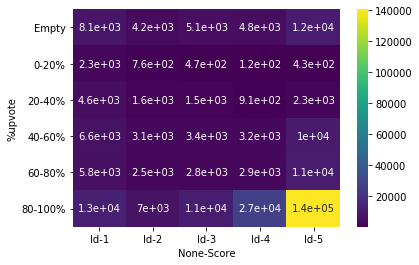

In [12]:
sns.heatmap(pivot, cmap = 'viridis', annot = True)

In [13]:
df['Score'].unique()

array([5, 1, 4, 2, 3], dtype=int64)

In [14]:
df2 = df[df['Score']!=3]
x=df2['Text']
y_dict = {1:0,2:0,4:1,5:1}
y=df2['Score'].map(y_dict)

### Converting text into vectors

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
c= CountVectorizer('english')

C:\Users\srira\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass input=english as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [17]:
x_c = c.fit_transform(x)

In [18]:
print('features:{}' .format(x_c.shape))

features:(525814, 115282)


In [19]:
#train test split

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_c, y)
print(' train records: {}'.format(x_train.shape))

 train records: (394360, 115282)


In [21]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [22]:
ml =log.fit(x_train, y_train)
acc = ml.score(x_test, y_test)
print ('Model Accuracy: {}'.format(acc))

Model Accuracy: 0.9383510581648333


C:\Users\srira\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [23]:
import warnings

#Ignoring unnecessory warnings
warnings.filterwarnings("ignore") 

### Top 10 positive and negative words

In [24]:
words = c.get_feature_names()
words


['00',
 '000',
 '0000',
 '000001',
 '00001',
 '000013',
 '0000soo',
 '0001',
 '000111052',
 '0002251337',
 '0003',
 '0004',
 '000iu',
 '000kwh',
 '000mg',
 '000mi',
 '000s',
 '000su',
 '000usd',
 '000v',
 '001',
 '00100',
 '00127',
 '00128',
 '00129',
 '00130',
 '00131',
 '00132',
 '00134',
 '00136',
 '00139',
 '001bru',
 '002',
 '0020100604',
 '00202',
 '00227',
 '0023',
 '003',
 '004',
 '00493',
 '005',
 '00533',
 '0060187654',
 '0060721855',
 '0060928115',
 '0060959584',
 '0061658197',
 '006176793x',
 '0067575986',
 '0069615',
 '007',
 '00703',
 '00704',
 '0071468633',
 '0071477845',
 '0071486011',
 '0071499849',
 '008',
 '0099',
 '00a',
 '00am',
 '00b',
 '00gr',
 '00lb',
 '00m',
 '00pm',
 '00s',
 '00something',
 '00z',
 '01',
 '010',
 '0100',
 '01014',
 '01069',
 '011',
 '012',
 '013',
 '01317',
 '01318',
 '014',
 '0140444254',
 '0140446680',
 '0143114964',
 '014mg',
 '015',
 '017',
 '0174',
 '018',
 '0188',
 '019',
 '01915',
 '0199232768',
 '0199535892',
 '0199536066',
 '02',
 '02

In [25]:
coeff = ml.coef_
coef = coeff[0].tolist()
coef


[-0.31047646989013383,
 -0.010113312348579312,
 0.13873402538898294,
 -0.0023270628686940776,
 0.0013348797325384403,
 -0.005068092113171544,
 0.0001258013922522632,
 -0.005425894010521813,
 0.0006545786822995145,
 8.395306043262482e-05,
 0.000192080558320956,
 -0.005889667742770112,
 0.00031092377657894623,
 0.005688567419424977,
 -0.1396703423103382,
 0.00018294679516677446,
 0.0004571544449157715,
 0.002340640653715459,
 0.004966713744123963,
 0.0028140153384122856,
 -0.019456430214952827,
 0.007361221608815619,
 0.019924854817442415,
 0.019924854817442415,
 0.019924854817442415,
 0.019924854817442415,
 0.019924854817442415,
 0.019924854817442415,
 0.019924854817442415,
 0.019924854817442415,
 0.019924854817442415,
 -8.498485835345557e-05,
 0.018660206639293308,
 5.347306071163671e-06,
 -0.027967729232130797,
 -0.0012799993273022079,
 0.0,
 0.000705728400883691,
 0.02565403813991417,
 6.0168923418686314e-06,
 -0.05157896053828817,
 0.0019806179499055826,
 6.746516565141283e-05,
 0.0

In [26]:

coeff_df = pd.DataFrame({'word':words, 'coefficients':coef})
coeff_df

,word,coefficients
0,00,-0.310476
1,000,-0.010113
2,0000,0.138734
3,000001,-0.002327
4,00001,0.001335
...,...,...
115277,çaykur,0.000000
115278,çelem,-0.035678
115279,être,0.008219
115280,île,0.008685


In [27]:
coeff_df = coeff_df.sort_values(['coefficients', 'word'],ascending=False)
coeff_df

,word,coefficients
55155,hooked,2.652363
80801,pleasantly,2.571858
94888,skeptical,2.537596
19523,beat,2.056771
113443,worried,1.902286
...,...,...
107654,undrinkable,-2.193176
37630,disappointment,-2.207640
96731,sounded,-2.218803
37627,disappointing,-2.277425


In [28]:
print('-Top 10 positive-')
print(coeff_df.head(10).to_string(index=False))
print('\n')
print('-Top 10 negative-')        
print(coeff_df.tail(10).to_string(index=False))

-Top 10 positive-
       word  coefficients
     hooked      2.652363
 pleasantly      2.571858
  skeptical      2.537596
       beat      2.056771
    worried      1.902286
  excellent      1.817176
    perfect      1.778572
   downside      1.719694
  favorites      1.703107
 refreshing      1.682509


-Top 10 negative-
           word  coefficients
      cancelled     -1.954819
      tasteless     -1.955523
         ruined     -1.992503
           skip     -2.034796
          worst     -2.103790
    undrinkable     -2.193176
 disappointment     -2.207640
        sounded     -2.218803
  disappointing     -2.277425
           yuck     -2.340162


In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix

### Creating a function to apply multiple NLP techniques and ML algorithms

In [30]:
def text_model_metrics(x,y,nlp_model,ml_model):
    x_c = nlp_model.fit_transform(x)
    print('features:{}'.format(x_c.shape[1]))
    x_train, x_test, y_train, y_test = train_test_split(x_c, y)
    print(' train records: {}'.format(x_train.shape[0]))
    print(' test records: {}'.format(x_test.shape[0]))
    ml1 = ml_model.fit(x_train,y_train)
    ml = ml1.score(x_test,y_test)
    print ('Model Accuracy: {}'.format(acc))
    predictions=ml1.predict(x_test)
    cm=confusion_matrix(predictions,y_test)
    print('/n Confusion matrix:{}'.format(cm))
    accu=accuracy_score(predictions,y_test)
    print('/n accuracy_score: {}' .format(accu))
    

In [31]:

text_model_metrics(x,y,c,log)

features:115282
 train records: 394360
 test records: 131454
Model Accuracy: 0.9383510581648333
/n Confusion matrix:[[ 15115   2881]
 [  5391 108067]]
/n accuracy_score: 0.9370730445631171


In [32]:
## Accuracy is about 94%
##Now testing on other ML algorithms

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
text_model_metrics(x, y, tfidf, log)

features:114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.9383510581648333
/n Confusion matrix:[[ 14319   2386]
 [  6210 108539]]
/n accuracy_score: 0.9346083040455216


In [34]:
## Accuracy is almost same. But due to tfidf the difference between coefficient's magnitude is much better.  

### Upvote prediction

In [35]:
##focusing on score 5 reviews

In [36]:
data3 = df[df['Score'] == 5]

In [37]:
data3.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       '%helpfulness', '%upvote'],
      dtype='object')

In [38]:
data4 = data3[data3['%upvote'].isin(['0-20%', '20-40%', '60-80%', '80-100%'])]
data4.shape

(154428, 12)

In [39]:
X = data4['Text']

In [40]:
y_dict = {'0-20%': 0, '20-40%': 0, '60-80%': 1, '80-100%': 1}
y = data4['%upvote'].map(y_dict)

In [41]:
print(y.value_counts())

1.0    151721
0.0      2707
Name: %upvote, dtype: int64


In [42]:
## Target class is skewed. Positive upvotes are higher than negative ones. 
## Resampling the data to obtain a balance

In [43]:
X_c = tfidf.fit_transform(X)

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X_c,y,train_size=0.7)

In [45]:
y_test.value_counts()

1.0    45509
0.0      820
Name: %upvote, dtype: int64

In [46]:
## Random Over Sampling to handle the imbalance in the data
from imblearn.over_sampling import RandomOverSampler

In [47]:
os =  RandomOverSampler()

In [48]:
X_train_res, y_train_res = os.fit_resample(X_c, y)

In [49]:
X_train_res.shape,y_train_res.shape

((303442, 67196), (303442,))

In [50]:
from collections import Counter

In [51]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({1.0: 151721, 0.0: 2707})
Resampled dataset shape Counter({1.0: 151721, 0.0: 151721})


In [52]:
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}

In [53]:
import numpy as np
from sklearn.model_selection import GridSearchCV

In [55]:
clf=GridSearchCV(estimator=log,param_grid=grid,cv=5,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train_res,y_train_res)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [56]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[  820     0]
 [  693 44816]]
0.9850417664961472
